In [20]:
import numpy as np
import argparse
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from keras.callbacks import ModelCheckpoint

In [21]:
MODEL_SAVE_FILE = 'model/k.h5'

In [22]:

def plot_model_history(model_history):

    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

In [23]:

train_dir = 'data/train'
val_dir = 'data/test'

num_train = 28709
num_val = 7178
batch_size = 128
num_epoch = 75

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
train_datagen = ImageDataGenerator(
    rescale=1./255)
    # featurewise_center=False,  # set input mean to 0 over the dataset
    # samplewise_center=False,  # set each sample mean to 0
    # featurewise_std_normalization=False,  # divide inputs by std of the dataset
    # samplewise_std_normalization=False,  # divide each input by its std
    # zca_whitening=False,  # apply ZCA whitening
    # rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
    # width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    # height_shift_range=0.2)  # randomly shift images vertically (fraction of total height)
    # horizontal_flip=False,  # randomly flip images
    # vertical_flip=True)  # randomly flip images

train_datagen

In [27]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size= (48,48),
        batch_size= batch_size,
        color_mode= "grayscale",
        class_mode= 'categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size= (48,48),
        batch_size= batch_size,
        color_mode= "grayscale",
        class_mode= 'categorical')

train_generator

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [28]:
# Create the model
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 20, 20, 64)        36928     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 9, 9, 64)         

In [29]:

    
# model.add(Conv2D(60, (3, 3), activation='relu', padding = 'same', input_shape=(48,48,1)))    
# model.add(Dropout(0.2))

# model.add(Conv2D(60, (3, 3), activation='relu', padding = 'same'))  
# model.add(Conv2D(60, (3, 3), activation='relu', padding = 'same', strides = 2))    
# model.add(Dropout(0.5))

# model.add(Conv2D(120, (3, 3), activation='relu', padding = 'same'))    
# model.add(Conv2D(120, (3, 3), activation='relu', padding = 'same'))
# model.add(Conv2D(120, (3, 3), activation='relu', padding = 'same', strides = 2))    
# model.add(Dropout(0.5))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(128, (3, 3), padding = 'same'))
# model.add(Activation('relu'))
# model.add(Conv2D(128, (1, 1),padding='valid'))
# model.add(Activation('relu'))
# model.add(Conv2D(7, (1, 1), padding='valid'))

# model.add(GlobalAveragePooling2D())

# model.add(Activation('softmax'))


########################################################3

# model = Sequential()

# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(128, (3, 3), activation='relu', padding = 'same'))  
# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# model.add(Flatten())
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(7, activation='softmax'))
#########################################################################################

# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
# model.add(BatchNormalization())
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(7, activation='softmax'))

#########################################################################################

# model.add(Conv2D(128, (5,5), input_shape=(48, 48, 1), activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(64,(5,5),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(256,(3,3),activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(256,(3,3),activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))


# model.add(Flatten())
# model.add(Dense(128,activation='relu'))
# model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(7, activation='softmax'))


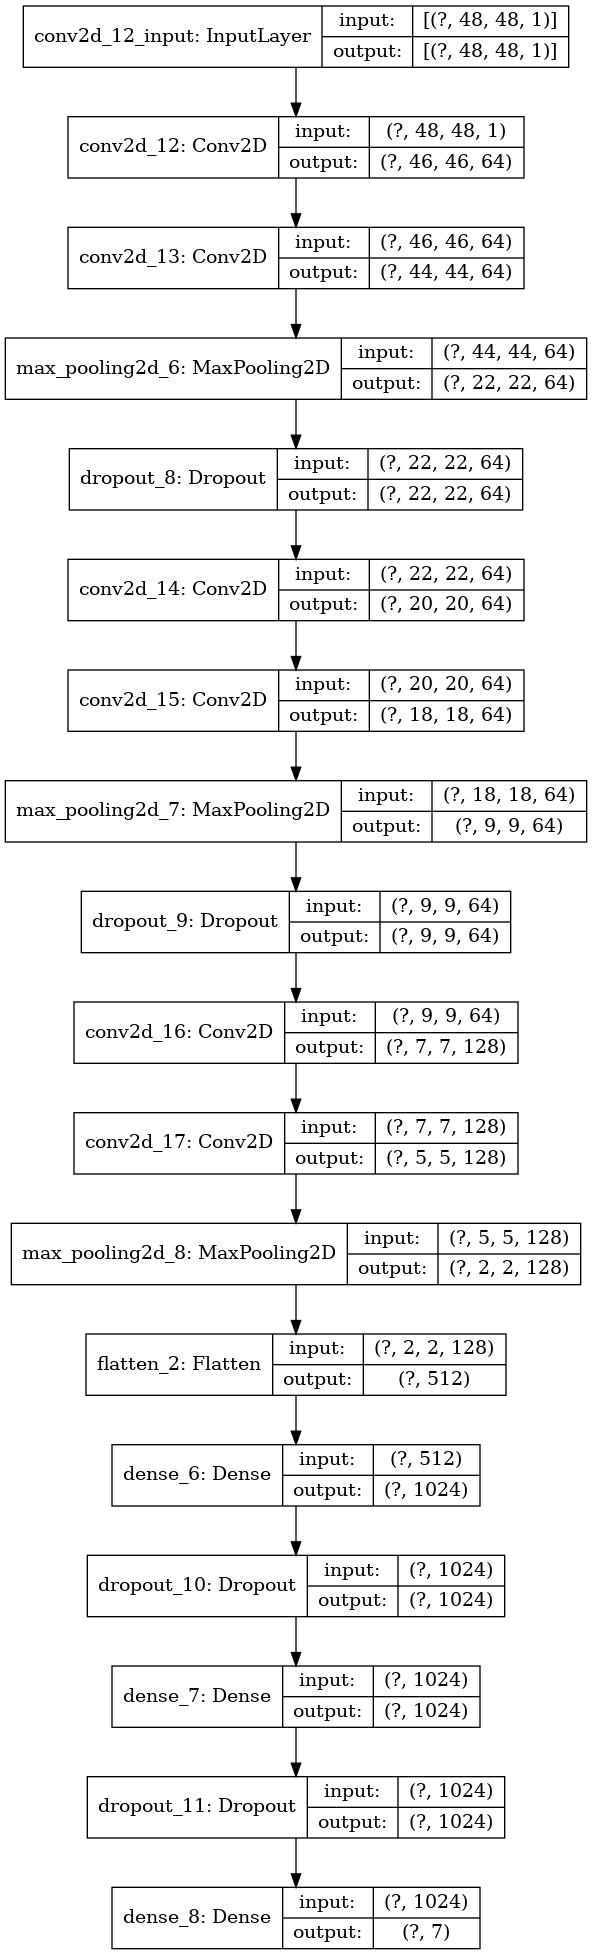

In [30]:
from keras.utils.vis_utils import plot_model


plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [31]:
checkpoint = ModelCheckpoint(MODEL_SAVE_FILE,  # model filename
                             monitor='val_loss', # quantity to monitor
                             verbose=0, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 
                                          # automatically depending on the quantity to monitor

In [40]:
LEARN_RATE = 1.0e-4

def train(num_epoch = 50, load=False):
    if load and os.path.exists(MODEL_SAVE_FILE): 
        print('Loading simple model Weights')
        model.load_weights(MODEL_SAVE_FILE)
    model.compile(loss ='categorical_crossentropy',
                optimizer='adam',
                  metrics=['accuracy'])
    model_info = model.fit(
            train_generator,
            batch_size = 128,
            # steps_per_epoch= num_train / batch_size,
            epochs=num_epoch,
            validation_data=validation_generator,
            # validation_steps=num_val / batch_size,
            verbose=1,
            shuffle=True,
            callbacks=[checkpoint])
    plot_model_history(model_info)
    model.save_weights('k.h5')

In [41]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau, Callback

early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.00001,patience=11,verbose=1,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=10,verbose=1)
callbaks = [early_stopping,reduce_lr]
callbaks

In [42]:
def display():
    
    model.load_weights(MODEL_SAVE_FILE)

    # prevents openCL usage and unnecessary logging messages
    cv2.ocl.setUseOpenCL(False)

    # dictionary which assigns each label an emotion (alphabetical order)
    emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

    # start the webcam feed
    cap = cv2.VideoCapture(0)
    while True:
        # Find haar cascade to draw bounding box around face
        ret, frame = cap.read()
        if not ret:
            break
        facecasc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
            roi_gray = gray[y:y + h, x:x + w]
            cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
            prediction = model.predict(cropped_img)
            maxindex = int(np.argmax(prediction))
            cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('Video', cv2.resize(frame,(1600,960),interpolation = cv2.INTER_CUBIC))
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [39]:
train()

Epoch 1/50
 29/225 [==>...........................] - ETA: 1:34 - loss: 1.8137 - accuracy: 0.2535

KeyboardInterrupt: 

In [17]:
display()